In [39]:
import warnings
warnings.filterwarnings("ignore")

import os
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import squidpy as sq
import matplotlib.pyplot as plt

In [40]:
in_dir = "../../results/10_stereo_seq/10_neighbor_enrichment"
out_dir = "../../results/10_stereo_seq/11_neighbor_enrichment"

os.makedirs(out_dir, exist_ok=True)

In [41]:
df_list = []

for sample in ["HC01", "HL05", "HL25", "HL35"]:
    adata = sc.read_h5ad(f"{in_dir}/{sample}.h5ad")
    sq.gr.co_occurrence(adata, cluster_key="cell_type", interval=101)
    occurrence_data = adata.uns["cell_type_co_occurrence"]
    
    out = occurrence_data["occ"]
    interval = occurrence_data["interval"][1:]
    
    categories = adata.obs["cell_type"].cat.categories
    
    idx = np.where(categories == "Fibroblasts")[0][0]
    df = pd.DataFrame(out[idx, :, :].T, columns=categories).melt(var_name="cell_type", value_name="co_occurrence")
    # df["distance"] = np.tile(interval, len(categories))
    
    df["distance"] = np.tile(list(range(100)), len(categories))
    
    df["sample"] = sample
    
    df_list.append(df)

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

  0%|          | 0/1 [00:00<?, ?/s]

In [38]:
len(interval)

99

In [42]:
df = pd.concat(df_list)

In [43]:
df.head()

,cell_type,co_occurrence,distance,sample
0,B cells,1.206891,0,HC01
1,B cells,1.409774,1,HC01
2,B cells,1.141087,2,HC01
3,B cells,1.423428,3,HC01
4,B cells,1.223730,4,HC01


In [44]:
df.to_csv(f"{out_dir}/co_occurrence.csv")

In [45]:
df.head()

,cell_type,co_occurrence,distance,sample
0,B cells,1.206891,0,HC01
1,B cells,1.409774,1,HC01
2,B cells,1.141087,2,HC01
3,B cells,1.423428,3,HC01
4,B cells,1.223730,4,HC01


Text(0.5, 1.0, 'HC01')

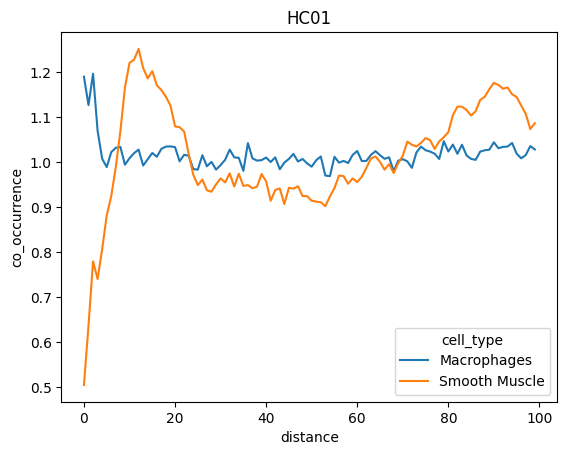

In [46]:
df1 = df[(df['sample'] == "HC01")&(df["cell_type"].isin(["Macrophages", "Smooth Muscle"]))]

sns.lineplot(
            x="distance",
            y="co_occurrence",
            data=df1,
            hue="cell_type")

plt.title("HC01")

Text(0.5, 1.0, 'HL05')

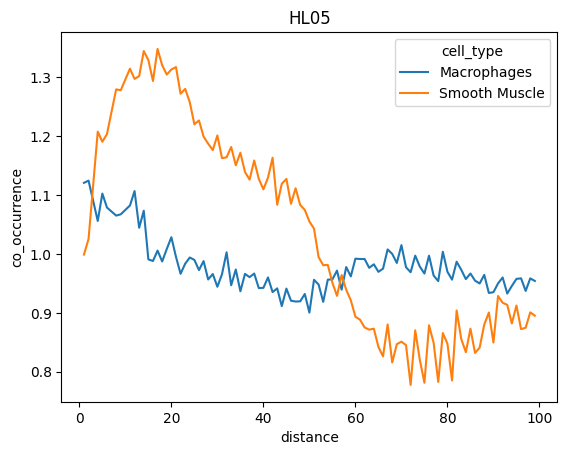

In [47]:
df1 = df[(df['sample'] == "HL05")&(df["cell_type"].isin(["Macrophages", "Smooth Muscle"]))]

sns.lineplot(
            x="distance",
            y="co_occurrence",
            data=df1,
            hue="cell_type")

plt.title("HL05")

Text(0.5, 1.0, 'HL25')

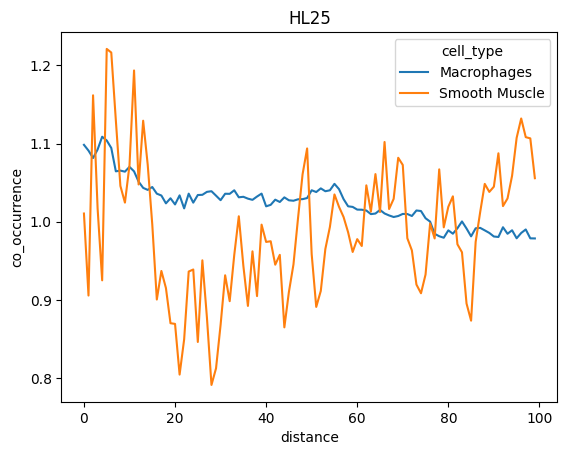

In [48]:
df1 = df[(df['sample'] == "HL25")&(df["cell_type"].isin(["Macrophages", "Smooth Muscle"]))]

sns.lineplot(
            x="distance",
            y="co_occurrence",
            data=df1,
            hue="cell_type")

plt.title("HL25")

Text(0.5, 1.0, 'HL35')

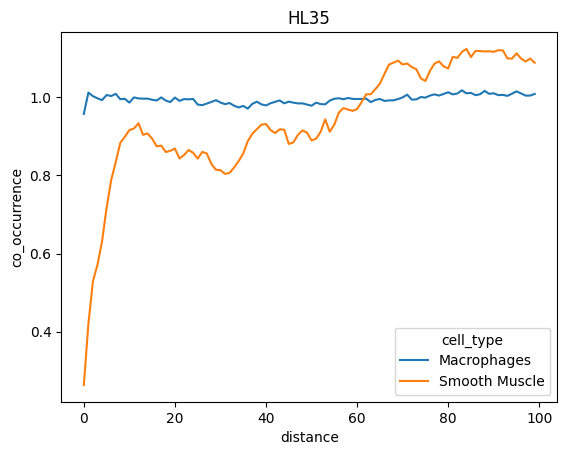

In [49]:
df1 = df[(df['sample'] == "HL35")&(df["cell_type"].isin(["Macrophages", "Smooth Muscle"]))]

sns.lineplot(
            x="distance",
            y="co_occurrence",
            data=df1,
            hue="cell_type")

plt.title("HL35")